In [ ]:
!nvidia-smi

Fri Aug 30 10:39:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Importing dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mn47MLoIJvdV6HOj2zYB")
project = rf.workspace("object-detection-yqwei").project("easybin")
version = project.version(2)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.83, to fix: `pip install ultralytics==8.0.196`


Training model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=800 plots=True


/content/datasets
WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
100% 21.5M/21.5M [00:00<00:00, 105MB/s] 
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed 

Confusion matrix

In [ ]:
%cd {HOME}

/content/datasets


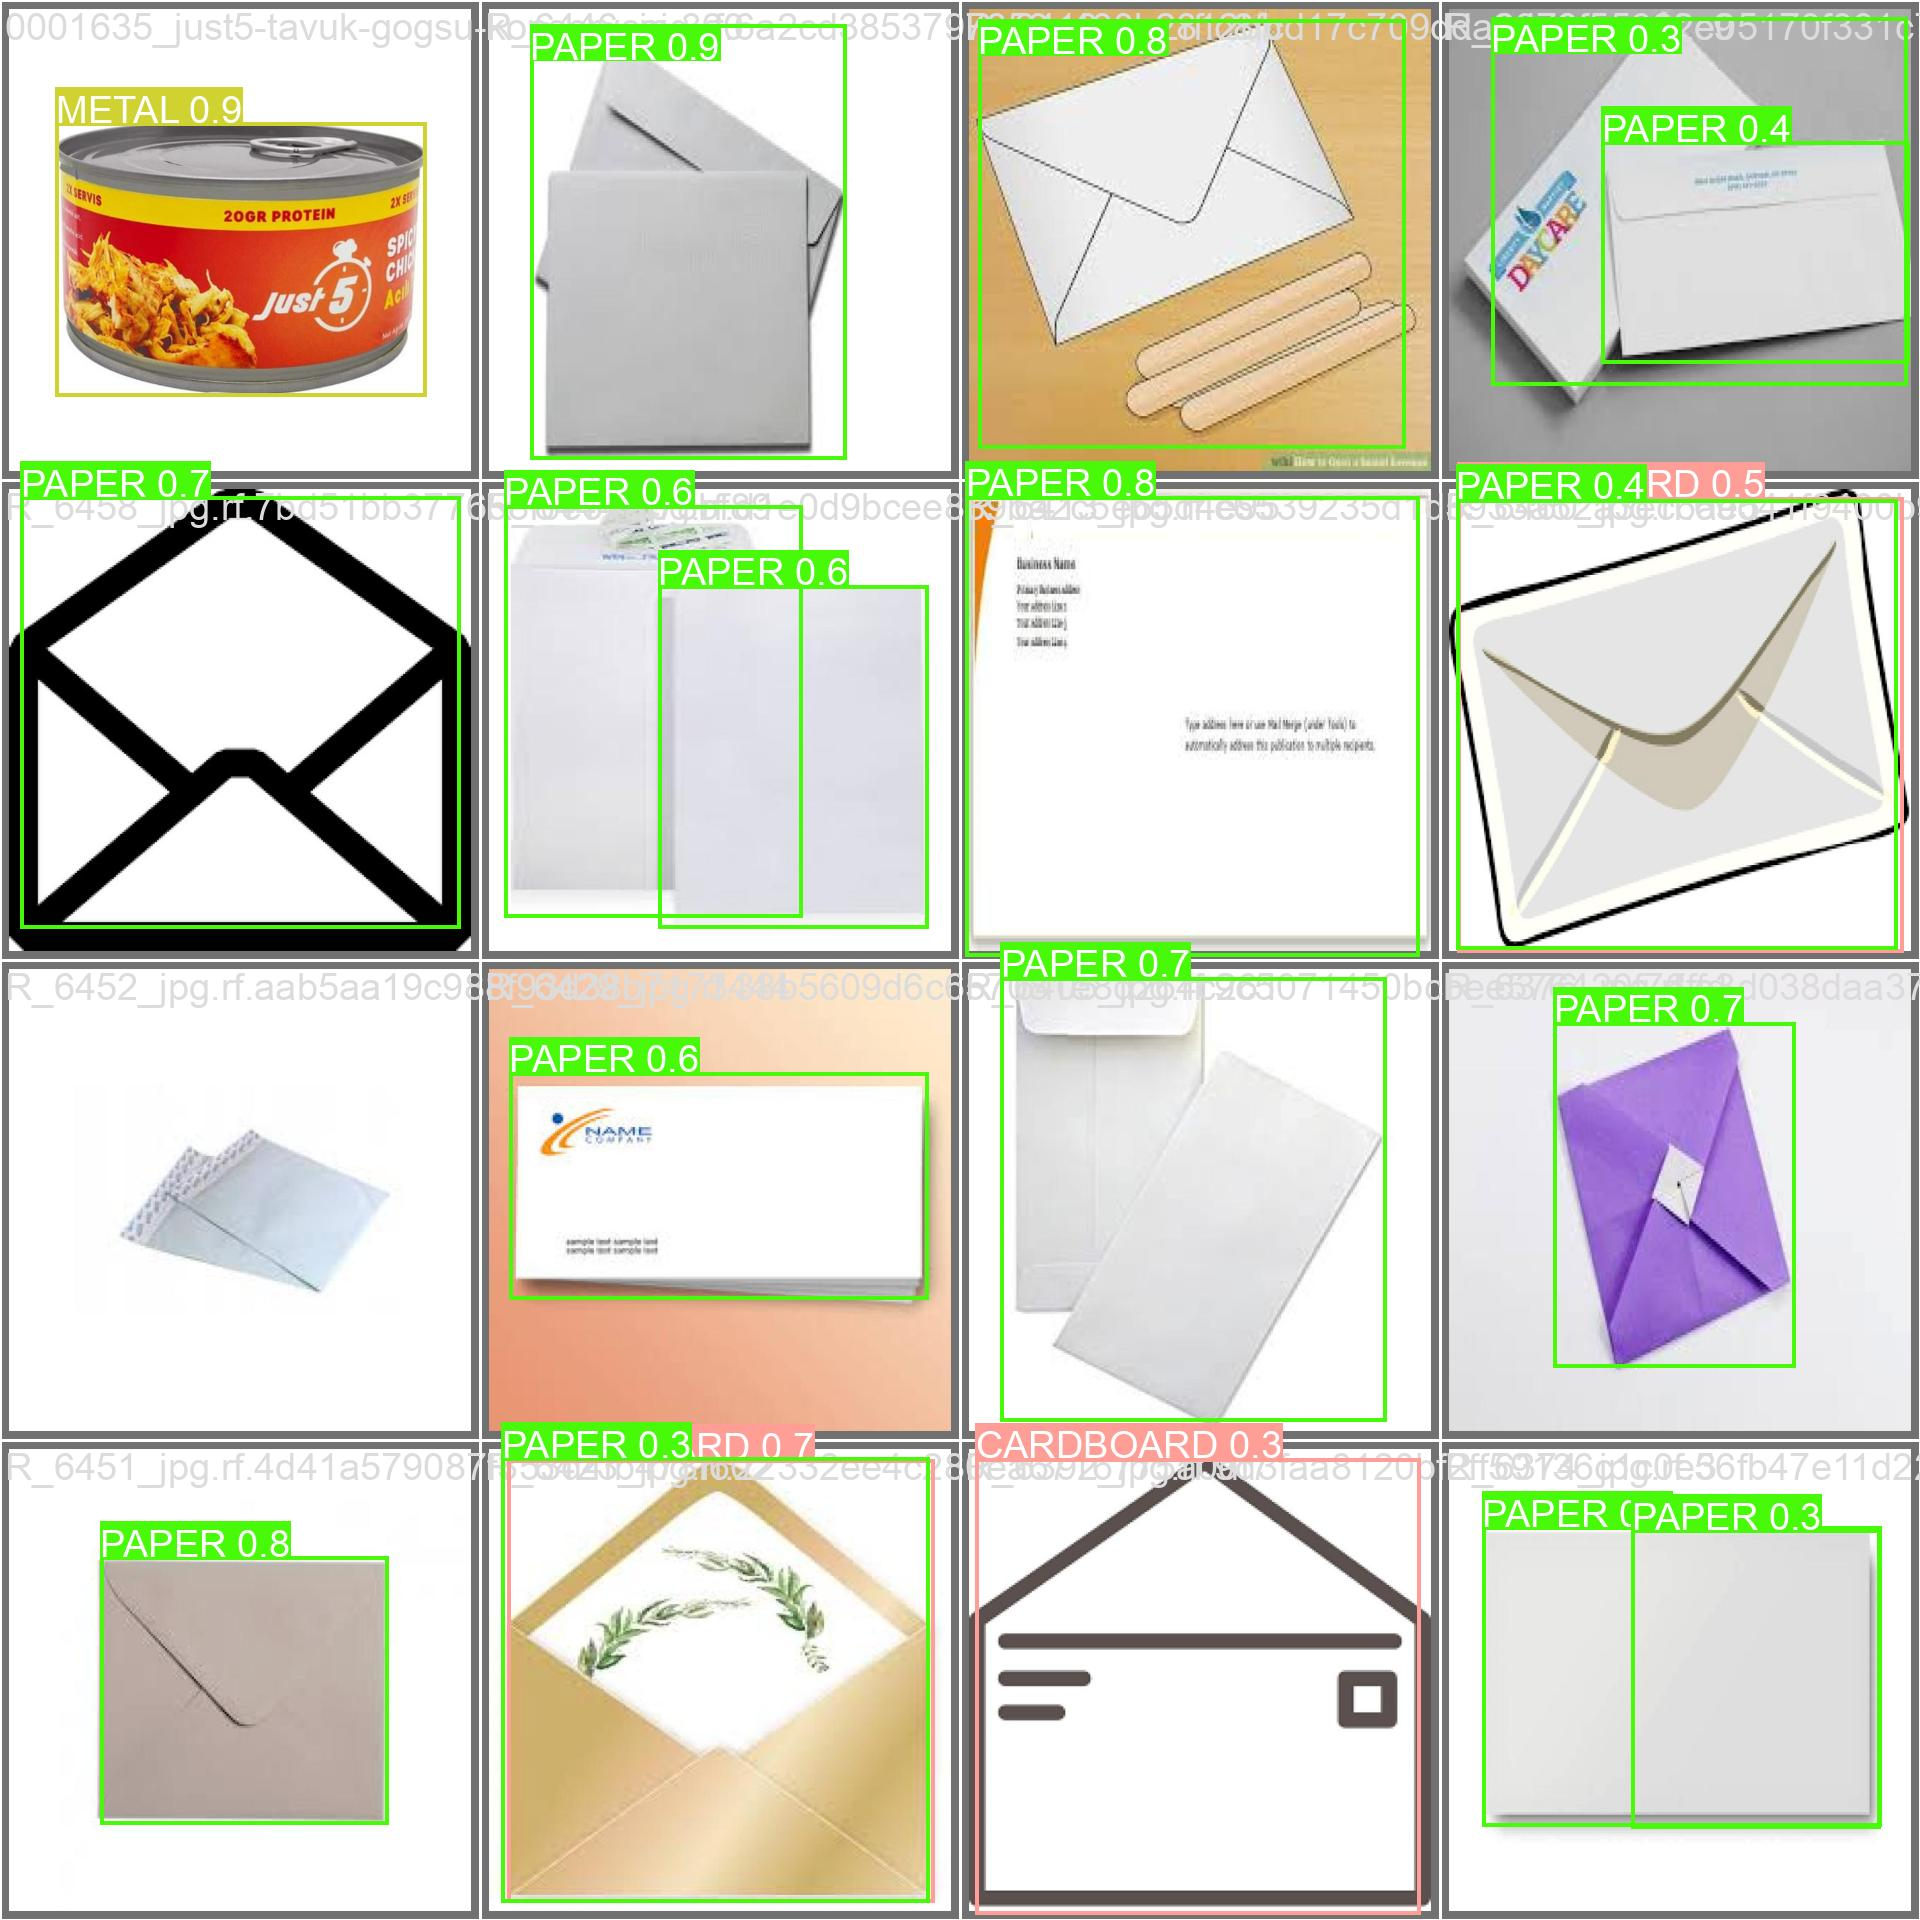

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


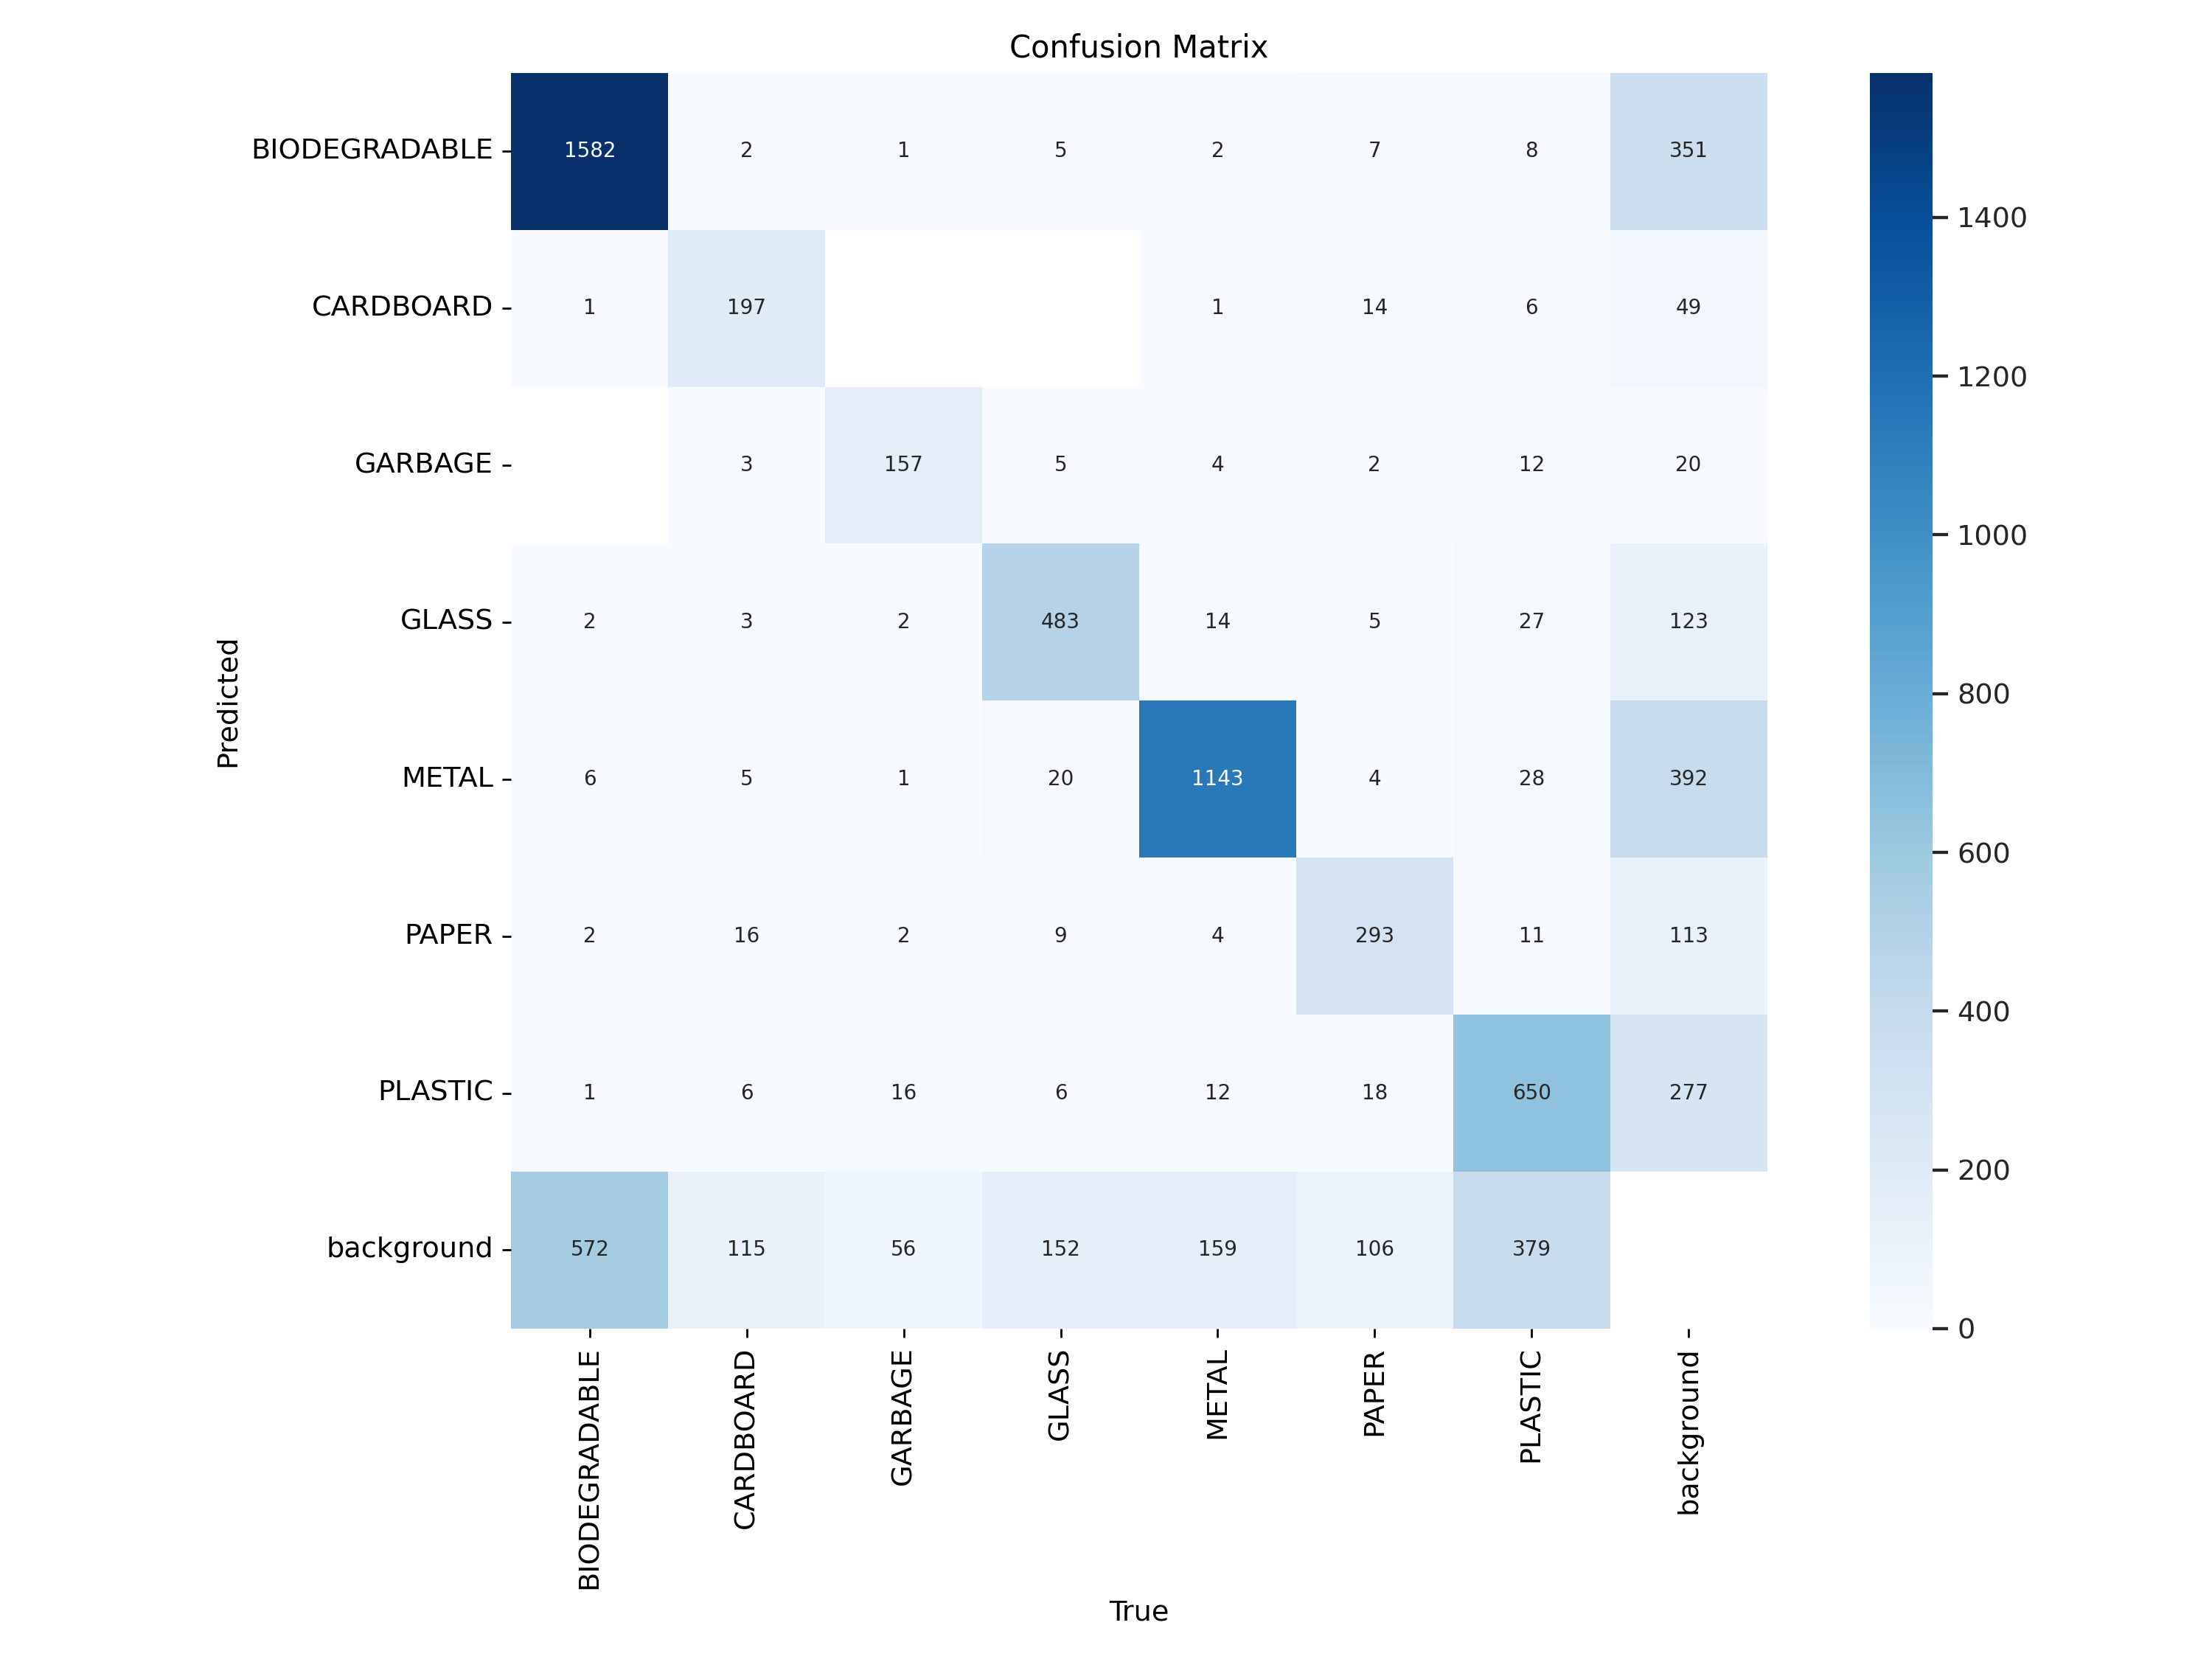

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

Validation

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/EasyBin-2/valid/labels.cache... 1938 images, 8 backgrounds, 0 corrupt: 100% 1938/1938 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 398, len(boxes) = 6337. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 122/122 [00:40<00:00,  3.00it/s]
                   all       1938       6337       0.7

Prediction from test images

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

image 1/969 /content/datasets/EasyBin-2/test/images/0018270_west-system-siringa-paketi-1x10ml-1x50ml_560_png.rf.5e394cf51cf2f400eff673c35d3031e3.jpg: 800x800 4 GARBAGEs, 22.5ms
image 2/969 /content/datasets/EasyBin-2/test/images/1-CrumpledFastFoodPaperBagMcdonalds3dmodel09-Kopya_jpg.rf.864f8232aa54a90abe441f7b33b28bb8.jpg: 800x800 1 BIODEGRADABLE, 1 PLASTIC, 22.5ms
image 3/969 /content/datasets/EasyBin-2/test/images/1000x1000-1-_jpg.rf.1693db1e6f7fd59c0fdef1fb5d769a2f.jpg: 800x800 1 METAL, 22.5ms
image 4/969 /content/datasets/EasyBin-2/test/images/1000x1000_jpg.rf.c7803a1a56e0f402d247b129b12a71fc.jpg: 800x800 1 PLASTIC, 22.4ms
image 5/969 /content/datasets/EasyBin-2/test/images/10107846819890_jpg.rf.3b0ef151539d8c01c7a9c6252d42ef8c.jpg: 800x800 1 PLASTIC, 22.4ms
image 6/969 /content/datasets/EasyBin-2/test/ima

Prediction from video

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/pranali.mp4 save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/517) /content/pranali.mp4: 480x800 1 PLASTIC, 100.6ms
video 1/1 (2/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.7ms
video 1/1 (3/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.6ms
video 1/1 (4/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.5ms
video 1/1 (5/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.6ms
video 1/1 (6/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.6ms
video 1/1 (7/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.6ms
video 1/1 (8/517) /content/pranali.mp4: 480x800 1 PLASTIC, 15.6ms
video 1/1 (9/517) /content/pranali.mp4: 480x800 1 PLASTIC, 13.9ms
video 1/1 (10/517) /content/pranali.mp4: 480x800 1 PLASTIC, 11.2ms
video 1/1 (11/517) /content/pranali.mp4: 480x800 1 PLASTIC, 11.2ms
video 1/1 (12/517) /content/pranali.mp4: 480x800 1 PLASTIC, 11.2ms
video 1/1 (13/517) /conte

Mounted at /content/drive
